In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initial Setting

Loading and exploring the available data

In [2]:
# create the dataframes with the given csv files
# Using a dict structure to store and generate the dataframes
file_name ={'orders':'orders', 'order_items':'order_items', 'products':'products',
            'product_category_english':'product_category_name_translation',
            'customers': 'customers','sellers': 'sellers',
            'payments':'payments', 'order_reviews':'order_reviews', 'geolocation':'geolocation'}
for name in file_name.keys():
    locals()[name] = pd.read_csv('datasets/'+file_name[name]+'.csv')

dataset_list = file_name.keys()
dataset_list

dict_keys(['orders', 'order_items', 'products', 'product_category_english', 'customers', 'sellers', 'payments', 'order_reviews', 'geolocation'])

In [3]:
# let's check the columns of the dataframes
df_columns_name = pd.DataFrame([globals()[i].columns for i in dataset_list], index = dataset_list).T
df_columns_name

,orders,order_items,products,product_category_english,customers,sellers,payments,order_reviews,geolocation
0,order_id,order_id,product_id,product_category_name,customer_id,seller_id,order_id,review_id,geolocation_zip_code_prefix
1,customer_id,order_item_id,product_category_name,product_category_name_english,customer_unique_id,seller_zip_code_prefix,payment_sequential,order_id,geolocation_lat
2,order_status,product_id,product_name_lenght,None,customer_zip_code_prefix,seller_city,payment_type,review_score,geolocation_lng
3,order_purchase_timestamp,seller_id,product_description_lenght,None,customer_city,seller_state,payment_installments,review_comment_title,geolocation_city
4,order_approved_at,shipping_limit_date,product_photos_qty,None,customer_state,None,payment_value,review_comment_message,geolocation_state
5,order_delivered_carrier_date,price,product_weight_g,None,None,None,None,review_creation_date,None
6,order_delivered_customer_date,freight_value,product_length_cm,None,None,None,None,review_answer_timestamp,None
7,order_estimated_delivery_date,None,product_height_cm,None,None,None,None,None,None
8,None,None,product_width_cm,None,None,None,None,None,None


In [4]:
def time_periods(x):
    if x>=5 and x<12:
        return "Morning"
    elif x>=12 and x<17:
        return "Afternoon"
    elif x>=17 and x<21:
        return "Evening"
    else:
        return "Night"

# clean the dataset with the neccessary columns:
orders_df = orders[['order_id','customer_id','order_status','order_purchase_timestamp','order_estimated_delivery_date',
                    'order_delivered_customer_date','order_delivered_carrier_date']]

# add the date columns
orders_df = orders_df.assign(
    purchase_date = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.date,
    purchase_year = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.year,
    purchase_month = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.month,
    purchase_MMYYYY= pd.to_datetime(orders_df['order_purchase_timestamp']).dt.strftime('%b-%y'),
    purchase_day = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.day_name(),
    purchase_hour = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.hour)

#add the time_periods
orders_df["purchase_time"]= orders_df["purchase_hour"].apply(time_periods)

orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date,purchase_date,purchase_year,purchase_month,purchase_MMYYYY,purchase_day,purchase_hour,purchase_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,2017-10-04 19:55:00,2017-10-02,2017,10,Oct-17,Monday,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,2018-08-07 15:27:45,2018-07-26 14:31:00,2018-07-24,2018,7,Jul-18,Tuesday,20,Evening
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,2018-08-17 18:06:29,2018-08-08 13:50:00,2018-08-08,2018,8,Aug-18,Wednesday,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,2017-12-02 00:28:42,2017-11-22 13:39:59,2017-11-18,2017,11,Nov-17,Saturday,19,Evening
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,2018-02-16 18:17:02,2018-02-14 19:46:34,2018-02-13,2018,2,Feb-18,Tuesday,21,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-28 00:00:00,2017-03-17 15:08:01,2017-03-10 11:18:03,2017-03-09,2017,3,Mar-17,Thursday,9,Morning
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-03-02 00:00:00,2018-02-28 17:37:56,2018-02-07 23:22:42,2018-02-06,2018,2,Feb-18,Tuesday,12,Afternoon
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-27 00:00:00,2017-09-21 11:24:17,2017-08-28 20:52:26,2017-08-27,2017,8,Aug-17,Sunday,14,Afternoon
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15 00:00:00,2018-01-25 23:32:54,2018-01-12 15:35:03,2018-01-08,2018,1,Jan-18,Monday,21,Night


### Orders by status
This is a comparation between the diferent order status at every year

order_status,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
purchase_year,,,,,,,,
2016,0.000000,7.900000,0.000000,81.160000,5.470000,0.610000,2.740000,2.130000
2017,0.000000,0.590000,0.010000,96.290000,0.390000,0.530000,1.180000,1.010000
2018,0.000000,0.620000,0.000000,97.730000,0.220000,0.110000,1.050000,0.270000


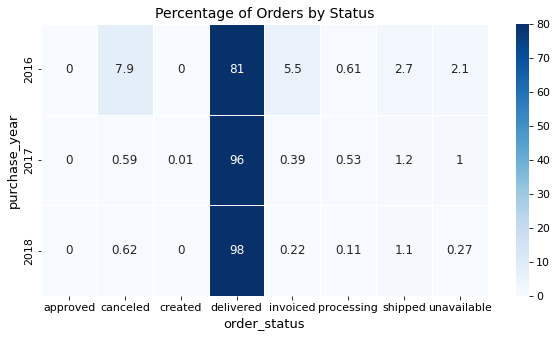

In [5]:
###calculate %orders by status for each year###

# define function to format chart (re-use for further charts):
def format_chart(ax):
  """
  this function sets the format of the chart
  title, axis and label sizes
  """
  ax.title.set_size(14)
  ax.xaxis.label.set_size(13)
  ax.yaxis.label.set_size(13)
  ax.tick_params(labelsize=11)

# Pivot table for counting orders by status and year
ord_sy = orders_df.pivot_table(values = 'order_id', index='order_status'
                                , columns='purchase_year', aggfunc= 'count')
ord_sy.fillna(0, inplace=True) # replace NaN with 0

# Add the percentage of order by status for each year:
ord_sy = ord_sy.apply(lambda x: ((x*100)/x.sum()).round(2), axis=0).T

# Show the percentage of orders by status for each year:
perc_ord_status=ord_sy.style.set_caption('Percentage of Orders by Status')

# plotting the results  into a heatmap
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.heatmap(data=ord_sy, cmap='Blues', linecolor="white", linewidths=0.5, vmin=0, vmax=80, 
               annot=True, annot_kws={"size":12});
ax.set_title("Percentage of Orders by Status")

# Formating the chart
format_chart(ax)

# Set fontsize, labels and save the figure
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
plt.savefig('figures/Percentage of Orders by Status', dpi=400, bbox_inches='tight');

perc_ord_status

## 🛍👥Products and Customers Data Merging
Let's take advantage of the relation between the customers, it's purchases and the details of each product in order to have detailed dataframe for the analysis.

**Datasets:** orders, order_items, products, customers and product_category_name (in order to translate the categories).

Is focused on the delivered products.

In [6]:
### Merging the datasets
detail_df= (((order_items.merge(orders_df, how="left",on='order_id'))
                 .merge(products, how="left",on='product_id'))
            .merge(product_category_english, how='left', on='product_category_name')).merge(customers, how="left", on="customer_id")

# Add column with condition for the weekend days of the purchase
conditions = [(detail_df['purchase_day'] == 'Saturday'),(detail_df['purchase_day'] == 'Sunday')]
choices = ['weekends', 'weekends']
detail_df['weekday'] = np.select(conditions, choices, default='workdays')

#filter order_status == "delivered" (because only analyze delivered orders):
detail_df= detail_df[detail_df['order_status']=='delivered']

detail_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,weekday
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,650.0,28.0,9.0,14.0,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,workdays
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,30000.0,50.0,30.0,40.0,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,workdays
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,3050.0,33.0,13.0,33.0,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,weekends
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,200.0,16.0,10.0,15.0,perfumery,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,workdays
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,3750.0,35.0,40.0,30.0,garden_tools,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,weekends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,10150.0,89.0,15.0,40.0,housewares,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,workdays
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,8950.0,45.0,26.0,38.0,computers_accessories,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,weekends
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,967.0,21.0,24.0,19.0,sports_leisure,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,workdays
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,100.0,20.0,20.0,20.0,computers_accessories,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,workdays


In [7]:
# Create a new product dataframe with the columns of the detailed df
products_df = detail_df[['order_id', 'product_id','price', 'order_status', 'purchase_date','purchase_MMYYYY', 'purchase_year','purchase_month','purchase_day','purchase_time','weekday','product_category_name_english', 'customer_unique_id', 'customer_state'
                         , 'order_delivered_customer_date', 'order_estimated_delivery_date','order_delivered_carrier_date','shipping_limit_date', 'seller_id']]

products_df

,order_id,product_id,price,order_status,purchase_date,purchase_MMYYYY,purchase_year,purchase_month,purchase_day,purchase_time,weekday,product_category_name_english,customer_unique_id,customer_state,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_carrier_date,shipping_limit_date,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,delivered,2017-09-13,Sep-17,2017,9,Wednesday,Morning,workdays,cool_stuff,871766c5855e863f6eccc05f988b23cb,RJ,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09-19 18:34:16,2017-09-19 09:45:35,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,delivered,2017-04-26,Apr-17,2017,4,Wednesday,Morning,workdays,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,SP,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-05-04 14:35:00,2017-05-03 11:05:13,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,delivered,2018-01-14,Jan-18,2018,1,Sunday,Afternoon,weekends,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,MG,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01-16 12:36:48,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,delivered,2018-08-08,Aug-18,2018,8,Wednesday,Morning,workdays,perfumery,af861d436cfc08b2c2ddefd0ba074622,SP,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08-10 13:28:00,2018-08-15 10:10:18,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,delivered,2017-02-04,Feb-17,2017,2,Saturday,Afternoon,weekends,garden_tools,64b576fb70d441e8f1b2d7d446e483c5,SP,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02-16 09:46:09,2017-02-13 13:57:51,df560393f3a51e74553ab94004ba5c87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,delivered,2018-04-23,Apr-18,2018,4,Monday,Afternoon,workdays,housewares,0c9aeda10a71f369396d0c04dce13a64,MA,2018-05-10 22:56:40,2018-05-18 00:00:00,2018-04-25 12:09:00,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,delivered,2018-07-14,Jul-18,2018,7,Saturday,Morning,weekends,computers_accessories,0da9fe112eae0c74d3ba1fe16de0988b,PR,2018-07-23 20:31:55,2018-08-01 00:00:00,2018-07-17 08:05:00,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,delivered,2017-10-23,Oct-17,2017,10,Monday,Evening,workdays,sports_leisure,cd79b407828f02fdbba457111c38e4c4,SP,2017-10-28 12:22:22,2017-11-10 00:00:00,2017-10-26 15:13:14,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,delivered,2017-08-14,Aug-17,2017,8,Monday,Night,workdays,computers_accessories,eb803377c9315b564bdedad672039306,SP,2017-08-16 21:59:40,2017-08-25 00:00:00,2017-08-15 19:02:53,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79


## 📊 Data visualizations

### E-Commerce Performance

#### 💰 Historical Revenue
📈Revenue calculated with the value of the purchases aggrupated by the month-year column.

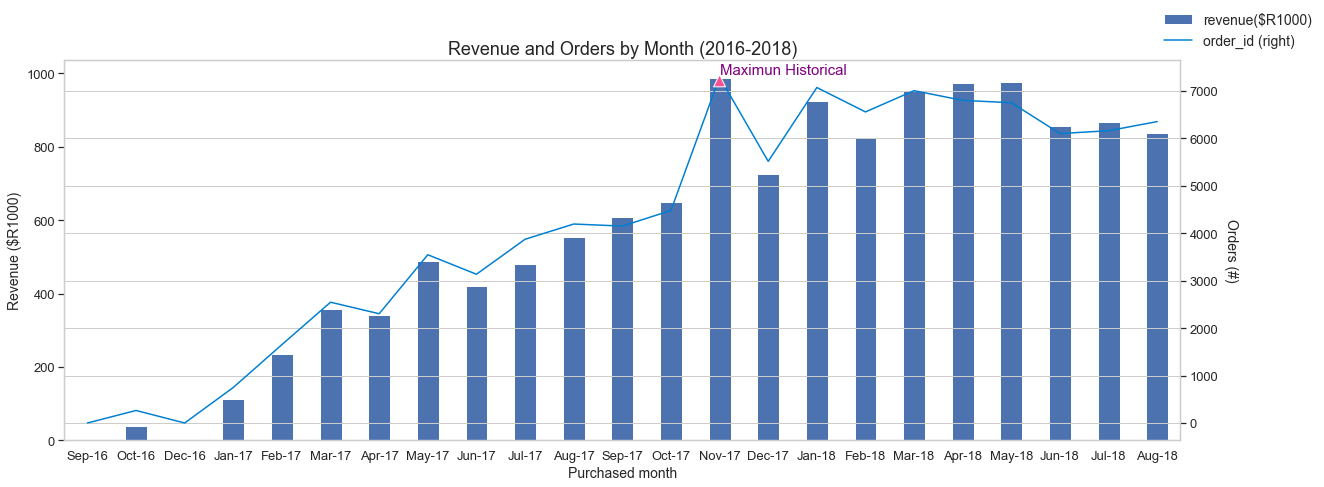

In [8]:
# Charts themes:
plt.style.use("seaborn-whitegrid")
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.5)

def format_chart_trend(ax):
    """
    title, axis and label size for the trend charts
    """
    ax.title.set_size(22)
    ax.xaxis.label.set_size(17)
    ax.yaxis.label.set_size(17)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
# Pivot table with the sum of delivered orders of every month
ord_by_M=products_df.pivot_table(values = ['order_id', 'price']
                              , index=['purchase_year','purchase_month','purchase_MMYYYY']
                              , aggfunc={'order_id':'nunique','price':'sum'})

# Sort data by month-year column
ord_by_M = ord_by_M.sort_index(ascending=[1,1,1])
ord_by_M.reset_index(inplace = True)
del ord_by_M['purchase_year']
del ord_by_M['purchase_month']
ord_by_M.set_index('purchase_MMYYYY', inplace=True)
ord_by_M['revenue($R1000)']=ord_by_M['price']/1000
del ord_by_M['price']

# Line chart with the sum of delivered orders of every month
width = .45
fig = plt.figure()
ax1 = ord_by_M['revenue($R1000)'].plot(kind='bar', figsize=(20,7), width = width)
ax2 = ord_by_M['order_id'].plot(secondary_y=True, color='#007FD1')
ax1.set(ylabel='Revenue ($R1000)')
ax1.set(title="Revenue and Orders by Month (2016-2018)", xlabel="Purchased month")
ax1.title.set_size(18)
ax1.xaxis.label.set_size(14)
ax1.yaxis.label.set_size(14)
ax1.xaxis.set_tick_params(labelsize=13)
ax1.yaxis.set_tick_params(labelsize=13)
ax2.yaxis.label.set_size(14)
ax2.yaxis.set_tick_params(labelsize=13)
ax2.set_ylabel('Orders (#)', rotation=-90, labelpad=20)
fig.legend(loc='upper right', fontsize=14)

# Highlight the maximun historical of revenue
from datetime import datetime
maximun_rev = 'Maximun Historical'
ax2.annotate(maximun_rev, xy=(13, 7289+50),
             xytext=(13, 7289 + 300),fontsize=15, color='purple',
             arrowprops=dict(facecolor='#FC5190',shrink=0.05),
             horizontalalignment='left', verticalalignment='top')
plt.savefig('figures/Revenue and Orders', dpi=400, bbox_inches='tight');

In [9]:
#Calculating the growth for the Maximun historical compared with the previous year

products_Maximun=products_df[products_df['purchase_year'].isin([2017,2018])]
products_Maximun=products_Maximun[products_Maximun['purchase_month']<=8]
products_Maximun['revenue($R1000)']=products_Maximun['price']/1000
products_Maximun=products_Maximun.pivot_table(values='revenue($R1000)', columns='purchase_year', aggfunc ='sum')
products_Maximun.reset_index(inplace=True)
products_Maximun['%Growth']=(products_Maximun[2018]/products_Maximun[2017]-1)*100
products_Maximun.columns.names = ['']
products_Maximun.index.names = ['']

products_Maximun

,index,2017,2018,%Growth
,,,,
0,revenue($R1000),2993.45613,7218.12512,141.130145


### 🗳 Orders

#### Orders trend at the Maximun historical (Nov-2017)

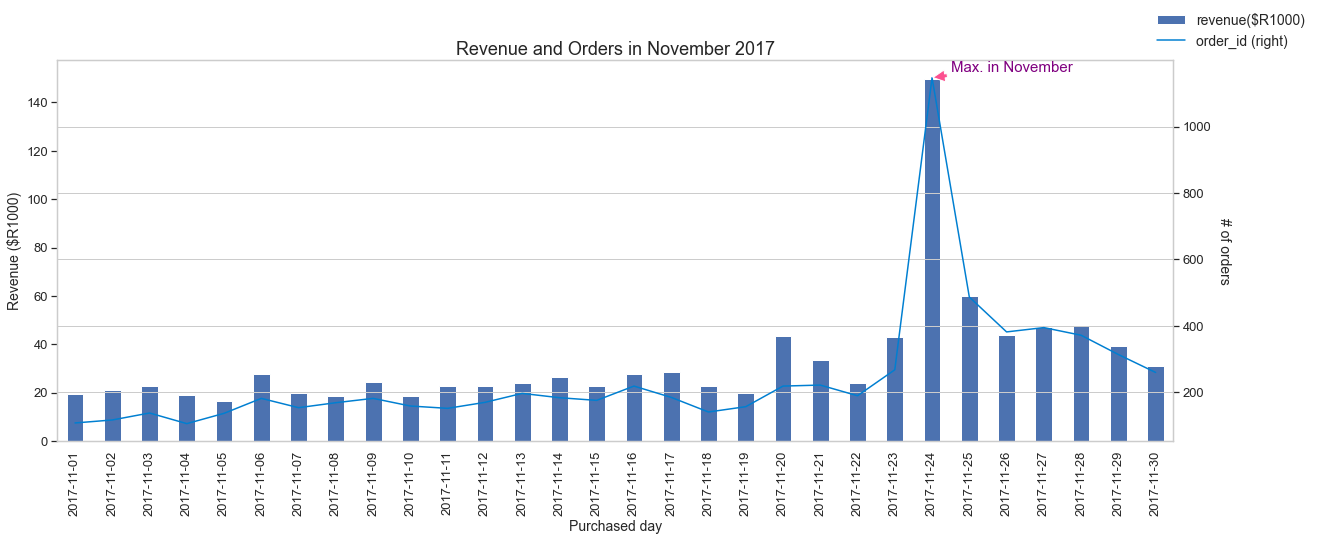

In [10]:
# Pivot table with the orders of nov 2017
ord_Nov_17=products_df[products_df['purchase_MMYYYY']== 'Nov-17'].pivot_table(values = ['order_id', 'price']
                              , index=['purchase_date']
                              , aggfunc={'order_id':'nunique','price':'sum'})

# date transfomed into string in order to draw the columns
ord_Nov_17.sort_index(ascending=True, inplace=True)
ord_Nov_17.reset_index(inplace = True)
ord_Nov_17 = ord_Nov_17.astype({"purchase_date": str}, errors='raise') 
ord_Nov_17.set_index('purchase_date', inplace=True)
ord_Nov_17['revenue($R1000)']=ord_Nov_17['price']/1000 # adjust the price to $R1000 scale

# Line chart
width = .45
fig = plt.figure(figsize=(20,7))
ax1 = ord_Nov_17['revenue($R1000)'].plot(kind='bar',width = width)
ax2 = ord_Nov_17['order_id'].plot(kind='line',secondary_y=True, color='#007FD1')
ax1.set(ylabel='Revenue ($R1000)')
ax1.set(title="Revenue and Orders in November 2017", xlabel="Purchased day")
ax1.title.set_size(18)
ax1.xaxis.label.set_size(14)
ax1.yaxis.label.set_size(14)
ax1.xaxis.set_tick_params(labelsize=13, rotation=90)
ax1.yaxis.set_tick_params(labelsize=13)

ax2.yaxis.label.set_size(14)
ax2.yaxis.set_tick_params(labelsize=13)
ax2.set_ylabel('# of orders', rotation=-90, labelpad=20) 
fig.legend(loc='upper right', fontsize=14)

#annotation of the peak point:
maximun_rev = 'Max. in November'
ax2.annotate(maximun_rev, xy=(23, 1147),
             xytext=(23+0.5, 1147 + 50),fontsize=15, color='purple',
             arrowprops=dict(facecolor='#FC5190',shrink=0.05),
             horizontalalignment='left', verticalalignment='top')
plt.savefig('figures/Revenue and Orders November 2017', dpi=400, bbox_inches='tight');

#### Orders: Daily and sizes

Comparition between # of orders and its size

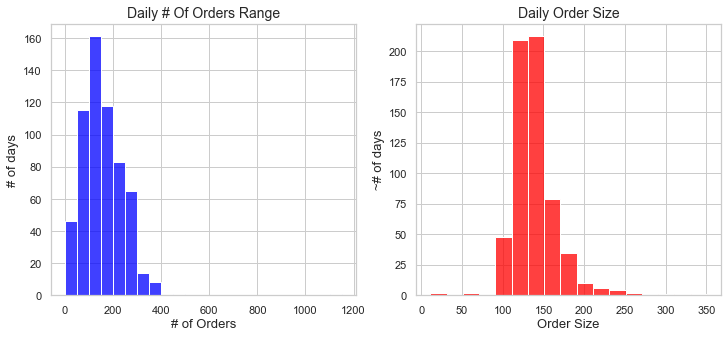

In [11]:
# Pivot table with the sum of orders, revenue and order size by date
daily_ord = products_df.pivot_table(values=["order_id","price"], index=['purchase_date','weekday']
                                ,aggfunc={"order_id":'nunique', "price":"sum"})
daily_ord['order_size'] = daily_ord['price']/daily_ord['order_id']


# Histplots
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(ax=ax[0], data=daily_ord, x="order_id", binwidth=50, color='blue')
ax[0].set(title='Daily # Of Orders Range', ylabel='# of days', xlabel='# of Orders')

sns.histplot(ax=ax[1], data=daily_ord, x="order_size", binwidth=20, color='red')
ax[1].set(title='Daily Order Size', ylabel='~# of days', xlabel='Order Size')

format_chart(ax[0])
format_chart(ax[1])
plt.savefig('figures/Daily Orders', dpi=400, bbox_inches='tight');

#### Orders Behaviour Through Day and Time
Variation of orders performance

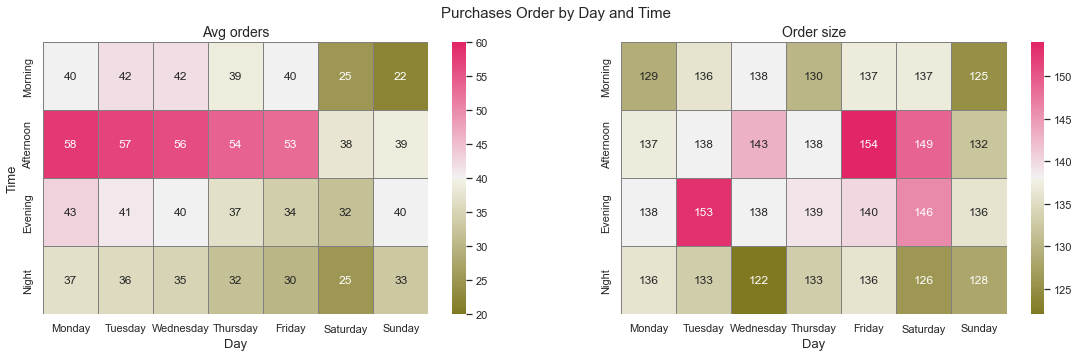

In [12]:
# Pivot table that sums the orders number, size by day and time
ord_day_time = products_df.pivot_table(values=["order_id","price"]
                                      , index=['purchase_date','purchase_day','purchase_time']
                                      ,aggfunc={"order_id":'nunique', "price":"sum"})
ord_day_time.fillna(0, inplace = True)
ord_day_time.reset_index(level=['purchase_date','purchase_day','purchase_time'], inplace=True)
ord_day_time["order_size"]=(ord_day_time["price"]/ord_day_time["order_id"])
ord_day_time.rename(columns={'order_id':'no_of_orders'}, inplace=True)

ord_daytime = ord_day_time.pivot_table(values=['no_of_orders','order_size'], index='purchase_time'
                                      , columns='purchase_day'
                                      , aggfunc='mean').astype(int)

# columns by day reindex
day_of_week = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
ord_daytime = ord_daytime.reindex(index= ['Morning', 'Afternoon','Evening','Night'])
ord_daytime = ord_daytime.reindex(columns= day_of_week, level = 'purchase_day')

# Heatmap ploting
cmap = sns.diverging_palette(80,0,90,50, as_cmap=True)
fig, ax = plt.subplots(1,2, figsize=(19,5))
fig.suptitle("Purchases Order by Day and Time", fontsize=15)

sns.heatmap(ord_daytime.iloc[:,:7], cmap=cmap, ax=ax[0], linecolor="grey", vmin = 20, vmax = 60, linewidths=0.5
            , annot=True,annot_kws={"size":12})
ax[0].set_title('Avg orders')
ax[0].set(xlabel="Day")
ax[0].set(ylabel="Time")
ax[0].set_xticklabels(day_of_week, rotation=360)

sns.heatmap(ord_daytime.iloc[:,7:], cmap=cmap, ax=ax[1],linecolor="grey", linewidths=0.5
            , annot=True,annot_kws={"size":12},fmt='d')
ax[1].set_title("Order size")
ax[1].set(ylabel=None, xlabel="Day")
ax[1].set_xticklabels(day_of_week, rotation=360)

format_chart(ax[0])
format_chart(ax[1])

#set fontsize for cbar: use matplotlib.colorbar object, then set labelsize
cbar0 = ax[0].collections[0].colorbar
cbar0.ax.tick_params(labelsize=11)
cbar1 = ax[1].collections[0].colorbar
cbar1.ax.tick_params(labelsize=11)
plt.savefig('figures/Order size by time and day', dpi=400, bbox_inches='tight');

#### Order By Week days

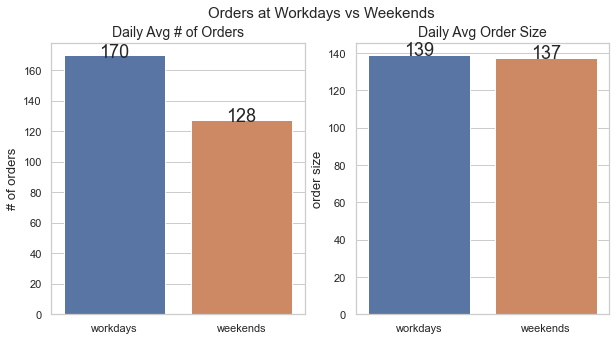

In [13]:
# Pivot table with the mean of daily # and size of the orders by workdays and weekends
ord_wd = daily_ord.pivot_table(values=['order_id','order_size'], index='weekday', aggfunc='mean')
ord_wd=ord_wd.reindex(index= ['workdays', 'weekends'])

# Barplot
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("Orders at Workdays vs Weekends", fontsize=15)
sns.barplot(x=ord_wd.index, y='order_id', data=ord_wd, ax=ax[0])
ax[0].set(title="Daily Avg # of Orders", xlabel=None, ylabel="# of orders")

sns.barplot(x=ord_wd.index, y='order_size', data=ord_wd, ax=ax[1])
ax[1].set(title="Daily Avg Order Size", xlabel=None, ylabel="order size")

# Value in columns:
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 3), 
                   textcoords = 'offset points')
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

format_chart(ax[0])
format_chart(ax[1])
plt.savefig('figures/Order workdays vs weekends', dpi=400, bbox_inches='tight');

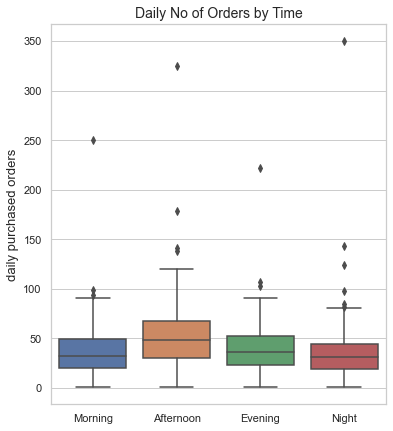

In [14]:
# pivot table with the mean of daily # and size of the orders by purchase date and time
ord_time=products_df.pivot_table(values="order_id", index=['purchase_date','purchase_time'],aggfunc="nunique")
ord_time.reset_index(level="purchase_date", inplace=True)
ord_time.reset_index(level="purchase_time", inplace=True)

# Boxplot chart
fig, ax = plt.subplots(figsize=(6,7))
sns.boxplot(data=ord_time, x="purchase_time", y="order_id",order=["Morning","Afternoon","Evening","Night"])
ax.set(title="Daily No of Orders by Time", xlabel=None, ylabel='daily purchased orders')
format_chart(ax)
plt.savefig('figures/Daily Orders by Time boxplot', dpi=400, bbox_inches='tight');

### 🏆 Top 20 products by category

Products grouped by its category according three different criteria:
- Revenue generated ($).
- Number of orders (#).
- Size of the orders ($).

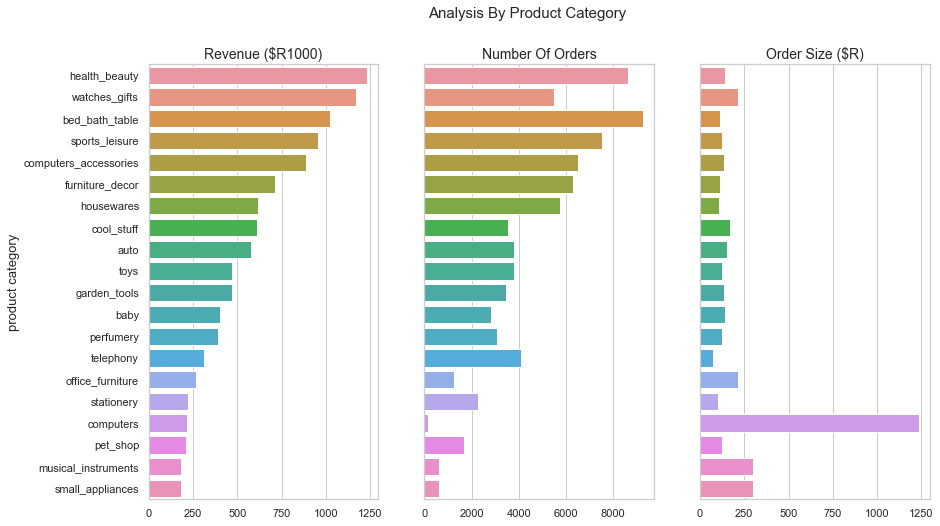

In [15]:
# Pivot table with the sum of revenue of each category, # and size of orders

prod_rank=products_df.pivot_table(values=['price', 'order_id'], index=['product_category_name_english']
                          , aggfunc={'price': 'sum', 'order_id': 'nunique'})
prod_rank["ord_size($R)"]=prod_rank["price"]/prod_rank["order_id"]
prod_rank["price"]=prod_rank["price"]/1000
prod_rank.sort_values(by='price', ascending = False, inplace = True)
prod_rank_top20=prod_rank.rename(columns={'order_id':'no_of_order','price':"revenue($R1000)"}).head(20)

#present data to bar plots:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 8), sharey=True)
fig.suptitle('Analysis By Product Category', fontsize=15)

sns.barplot(ax=ax[0], x='revenue($R1000)', y= prod_rank_top20.index, data = prod_rank_top20)
ax[0].set_title('Revenue ($R1000)')
ax[0].set_ylabel('product category')

sns.barplot(ax=ax[1], x='no_of_order', y = prod_rank_top20.index, data = prod_rank_top20)
ax[1].set_title('Number Of Orders')

sns.barplot(ax=ax[2], x='ord_size($R)', y = prod_rank_top20.index, data = prod_rank_top20)
ax[2].set_title('Order Size ($R)')

for i in range(0,3):
    ax[i].set(xlabel=None)

for i in range(1,3):
    ax[i].set(ylabel=None)

# Formating the charts
format_chart(ax[0])
format_chart(ax[1])
format_chart(ax[2])
plt.savefig('figures/Top 20 Product Category', dpi=400, bbox_inches='tight');


## ⏱ Delivery Performance

### 🕰 Average days per delivered

In [16]:
# add delivery related columns with date format
products_df = products_df.assign(
    order_delivered_customer_date = pd.to_datetime(products_df["order_delivered_customer_date"]).dt.date,
    order_delivered_carrier_date = pd.to_datetime(products_df["order_delivered_carrier_date"]).dt.date,
    order_estimated_delivery_date = pd.to_datetime(products_df["order_estimated_delivery_date"]).dt.date,
    shipping_limit_date = pd.to_datetime(products_df["shipping_limit_date"]).dt.date)

# calculate delivery delay: 
    # delivary days: delivery date - purchase date
    # delivary estimated days vs real deliver: estimated date - delivery customer date
    # limit vs carrier: shipping limit date - carrier date
products_df = products_df.assign(delivered_days= (products_df['order_delivered_customer_date'] - products_df['purchase_date']).dt.days
                                 ,days_est_vs_deliver= (products_df['order_estimated_delivery_date'] - products_df['order_delivered_customer_date']).dt.days
                                 ,days_limit_vs_deliver_carrier= (products_df['shipping_limit_date'] - products_df['order_delivered_carrier_date']).dt.days)

# Filtering only orders that are delivered at the moment of the historical data
products_df=products_df.assign(seller_to_carrier=np.where(products_df['days_limit_vs_deliver_carrier']<0,'late deliver to carrier','in time deliver to carrier'))
products_df['est_to_deliver'] = np.where(products_df['days_est_vs_deliver']<0, 'late deliver', 'on time deliver')

#delays of over 10, from 5 to 10 and under 5 days
conditions = [(products_df['days_est_vs_deliver'] < -10),
              (products_df['days_est_vs_deliver'] <= -5),
              (products_df['days_est_vs_deliver'] < 0)]
choices = ['late over 10 days', 'late from 5 days to 10 days','late under 5 days']
products_df['est_to_deliver_detail'] = np.select(conditions, choices, default='on time deliver')

# pivot table with the mean review score by order_id
reviews_unique = order_reviews.pivot_table(values='review_score', index='order_id', aggfunc = 'mean')
reviews_unique.reset_index(inplace=True)

# merging product and reviews dataframes
products_df=products_df.merge(reviews_unique[['order_id','review_score']], how="left", on ='order_id')

#remove duplicates for same products in 1 order to avoid errors
deliver_df=products_df.drop_duplicates(keep=False,inplace=False)

#Summary statistics
sum_nan = deliver_df.isna().sum()
sum_nan[sum_nan>0]

product_category_name_english    1322
order_delivered_customer_date       8
order_delivered_carrier_date        2
delivered_days                      8
days_est_vs_deliver                 8
days_limit_vs_deliver_carrier       2
review_score                      619
dtype: int64

In [17]:
#removeing NaN values
deliver_df=deliver_df.dropna(subset = ['order_delivered_customer_date','order_delivered_carrier_date'])
deliver_df

,order_id,product_id,price,order_status,purchase_date,purchase_MMYYYY,purchase_year,purchase_month,purchase_day,purchase_time,...,order_delivered_carrier_date,shipping_limit_date,seller_id,delivered_days,days_est_vs_deliver,days_limit_vs_deliver_carrier,seller_to_carrier,est_to_deliver,est_to_deliver_detail,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,delivered,2017-09-13,Sep-17,2017,9,Wednesday,Morning,...,2017-09-19,2017-09-19,48436dade18ac8b2bce089ec2a041202,7.0,9.0,0.0,in time deliver to carrier,on time deliver,on time deliver,5.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,delivered,2017-04-26,Apr-17,2017,4,Wednesday,Morning,...,2017-05-04,2017-05-03,dd7ddc04e1b6c2c614352b383efe2d36,16.0,3.0,-1.0,late deliver to carrier,on time deliver,on time deliver,4.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,delivered,2018-01-14,Jan-18,2018,1,Sunday,Afternoon,...,2018-01-16,2018-01-18,5b51032eddd242adc84c38acab88f23d,8.0,14.0,2.0,in time deliver to carrier,on time deliver,on time deliver,5.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,delivered,2018-08-08,Aug-18,2018,8,Wednesday,Morning,...,2018-08-10,2018-08-15,9d7a1d34a5052409006425275ba1c2b4,6.0,6.0,5.0,in time deliver to carrier,on time deliver,on time deliver,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,delivered,2017-02-04,Feb-17,2017,2,Saturday,Afternoon,...,2017-02-16,2017-02-13,df560393f3a51e74553ab94004ba5c87,25.0,16.0,-3.0,late deliver to carrier,on time deliver,on time deliver,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,delivered,2018-04-23,Apr-18,2018,4,Monday,Afternoon,...,2018-04-25,2018-05-02,b8bc237ba3788b23da09c0f1f3a3288c,17.0,8.0,7.0,in time deliver to carrier,on time deliver,on time deliver,5.0
110193,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,delivered,2018-07-14,Jul-18,2018,7,Saturday,Morning,...,2018-07-17,2018-07-20,f3c38ab652836d21de61fb8314b69182,9.0,9.0,3.0,in time deliver to carrier,on time deliver,on time deliver,5.0
110194,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,delivered,2017-10-23,Oct-17,2017,10,Monday,Evening,...,2017-10-26,2017-10-30,c3cfdc648177fdbbbb35635a37472c53,5.0,13.0,4.0,in time deliver to carrier,on time deliver,on time deliver,5.0
110195,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,delivered,2017-08-14,Aug-17,2017,8,Monday,Night,...,2017-08-15,2017-08-21,2b3e4a2a3ea8e01938cabda2a3e5cc79,2.0,9.0,6.0,in time deliver to carrier,on time deliver,on time deliver,5.0


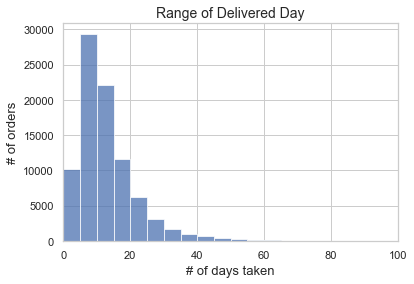

In [18]:
# Unique order with its delivered day
deliver_ord=deliver_df[['order_id','delivered_days']].drop_duplicates(keep=False)

# Plotting chart
ax = sns.histplot(data=deliver_ord[['order_id','delivered_days']], x='delivered_days', binwidth=5)
ax.set(title='Range of Delivered Day', ylabel='# of orders', xlabel='# of days taken')
ax.set_xlim(0,100)
format_chart(ax)
plt.savefig('figures/Range of Delivered Day', dpi=400, bbox_inches='tight');

### 🥇 Delivered days of top 5 product categories

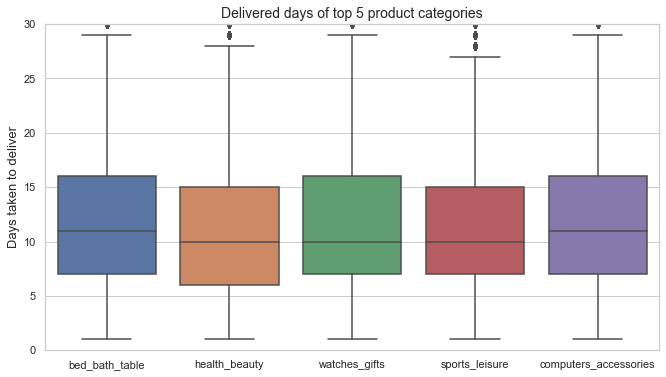

In [19]:
# unique order of delivered day and categories
deliver_uni_ord=deliver_df[['order_id','delivered_days','product_category_name_english']].drop_duplicates(keep=False)
deli_top_5= deliver_uni_ord[deliver_uni_ord['product_category_name_english'].isin(['bed_bath_table', 'health_beauty', 'watches_gifts','sports_leisure','computers_accessories'])]

#present data to boxplot:
fig, ax = plt.subplots(figsize=(11,6))
sns.boxplot(data=deli_top_5, x="product_category_name_english", y="delivered_days",order=['bed_bath_table', 'health_beauty', 'watches_gifts','sports_leisure','computers_accessories'])
ax.set(title="Delivered days of top 5 product categories", xlabel=None, ylabel='Days taken to deliver')
ax.set_ylim(0,30)
format_chart(ax)
plt.savefig('figures/Delivered days of top 5 products', dpi=400, bbox_inches='tight');


### 🔮 Real Delivery vs Estimation

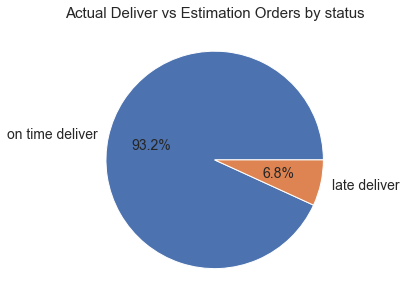

In [20]:
delivery_df=deliver_df[['order_id','est_to_deliver']]
deliver=delivery_df.pivot_table(values='order_id',index='est_to_deliver', aggfunc='nunique')
deliver.sort_values(by='order_id', ascending=False, inplace=True)

# present data to chart:
deliver.plot.pie(y='order_id', labels=deliver.index, autopct='%1.1f%%',textprops={'fontsize': 14},figsize=(5, 5))
plt.title('Actual Deliver vs Estimation Orders by status', size = 15)
plt.ylabel('')
plt.legend('')
plt.savefig('figures/Actual Deliver vs Estimation', dpi=400, bbox_inches='tight');


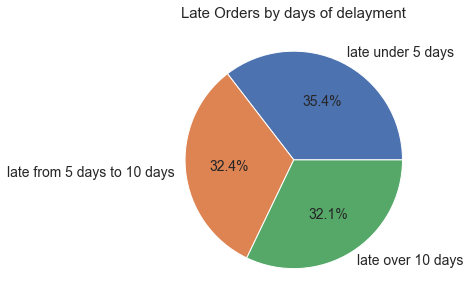

In [21]:
# Categorization of late deliveries
late_deliver_df=deliver_df[deliver_df['est_to_deliver']=='late deliver']
late_deli_status=late_deliver_df.pivot_table(values='order_id',index='est_to_deliver_detail', aggfunc='nunique')
late_deli_status.sort_values(by='order_id', ascending=False, inplace=True)

# Plotting chart
late_deli_status.plot.pie(y='order_id', labels=late_deli_status.index, autopct='%1.1f%%',textprops={'fontsize': 14},figsize=(5, 5))
plt.title('Late Orders by days of delayment', size = 15)
plt.ylabel('')
plt.legend('')
plt.savefig('figures/Late Orders by Delayed Days', dpi=400, bbox_inches='tight');

### 🔟 Deliver status and review score

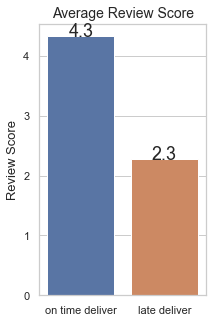

In [22]:
# Filtering orders with review and removing duplicates
review_score = deliver_df[~deliver_df['review_score'].isna()]
uni_review = review_score[['order_id','est_to_deliver','review_score']].drop_duplicates()

# Pivot table with the average review score of in time and late deliver orders
uni_review_pt = uni_review.pivot_table(values='review_score', index='est_to_deliver', aggfunc='mean')
uni_review_pt.sort_values(by=['review_score'], ascending=False, inplace=True)

# Plotting results
fig, ax = plt.subplots(1,1, figsize=(3,5))
ax = sns.barplot(x=uni_review_pt.index, y='review_score', data=uni_review_pt)
ax.set(title="Average Review Score", xlabel=None, ylabel="Review Score")


# Values in columns
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
format_chart(ax)
plt.savefig('figures/Review Score by Deliver Dates', dpi=400, bbox_inches='tight');

### 🚚 Late Delivers by Carrier

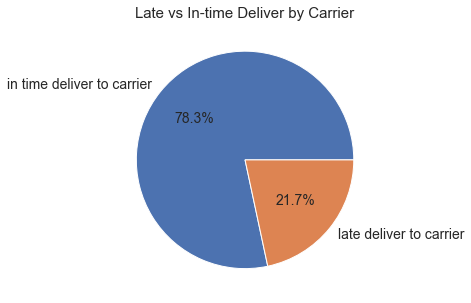

In [23]:
# Unique orders with late deliver
late_deliver=late_deliver_df.pivot_table(values='order_id',index='est_to_deliver', aggfunc='nunique')
late_deliver.rename(columns={'order_id':'unique_orders'}, inplace=True)

# Unique orders with late deliver by carrier
late_to_carrier=deliver_df[deliver_df['est_to_deliver']=='late deliver'].pivot_table(values='order_id',index='est_to_deliver', columns = 'seller_to_carrier', aggfunc='nunique')
deliver_to_carrier = late_deliver.merge(late_to_carrier, how = "left", on = 'est_to_deliver')

# Recalculat the # of orders because the products of a order may be delivered by different sellers and corresponding carriers
deliver_to_carrier.drop(columns='in time deliver to carrier')
deliver_to_carrier['in time deliver to carrier'] = deliver_to_carrier['unique_orders'] - deliver_to_carrier['late deliver to carrier']
deliver_to_carrier.drop(columns='unique_orders',inplace=True)
deli_to_carrier=deliver_to_carrier.T

# Plotting chart
deli_to_carrier.plot.pie(y='late deliver', labels=deli_to_carrier.index, autopct='%1.1f%%',textprops={'fontsize': 14},figsize=(5, 5))
plt.title('Late vs In-time Deliver by Carrier', size = 15)
plt.ylabel('')
plt.legend('')
plt.savefig('figures/Late vs In-time by Carrier', dpi=400, bbox_inches='tight');

### 🕵🏼‍♂️Late Deliver by Seller

In [24]:
# Unique orders by seller
seller=deliver_df[['seller_id','seller_to_carrier','order_id']]
seller_pv=seller.pivot_table(values='order_id',index='seller_id', aggfunc='nunique')
seller_pv.reset_index(inplace=True)
seller_pv.rename(columns={"order_id": "unique_order"}, inplace=True)

# Late orders by seller
seller_late_deliver=seller[seller.seller_to_carrier=='late deliver to carrier']
seller_late_deli = seller_late_deliver.drop_duplicates() #remove duplicates
seller_late=seller_late_deli.pivot_table(values='order_id',index='seller_id', aggfunc='nunique')
seller_late.reset_index(inplace=True)
seller_late.rename(columns={"order_id": "late_order"}, inplace=True)

# Percentage of late orders by seller
seller_summary=seller_pv.merge(seller_late, how="left", on='seller_id')
seller_summary.fillna(0, inplace=True) #fill the missing values with 0
seller_summary["percent_late_order"]=seller_summary.late_order*100/seller_summary.unique_order
seller_summary.sort_values("percent_late_order", ascending=False, inplace=True)
seller_summary.head(20) #Top 20 sellers with the highest percentage of late orders

# Average orders per seller
avg_ord_per_seller = pd.DataFrame(seller_pv.mean(numeric_only=True))
avg_ord_per_seller.reset_index(inplace=True)

# Seller with most late order: # of orders >= avg orders/seller & highest percentage of late orders
seller_top=seller_summary[seller_summary['unique_order']>=avg_ord_per_seller.iloc[0,1]]
seller_top = seller_top.sort_values("percent_late_order", ascending=False)
seller_top_10 = seller_top.head(10)
seller_top_10.set_index('seller_id', inplace=True)

seller_top_10

,unique_order,late_order,percent_late_order
seller_id,,,
48efc9d94a9834137efd9ea76b065a38,33,28.0,84.848485
835f0f7810c76831d6c7d24c7a646d4d,41,30.0,73.170732
a7f13822ceb966b076af67121f87b063,64,33.0,51.562500
1da366cade6d8276e7d8beea7af5d4bf,37,18.0,48.648649
54965bbe3e4f07ae045b90b0b8541f52,69,32.0,46.376812
a49928bcdf77c55c6d6e05e09a9b4ca5,89,38.0,42.696629
88460e8ebdecbfecb5f9601833981930,219,93.0,42.465753
ad781527c93d00d89a11eecd9dcad7c1,38,16.0,42.105263
834f8533b2ecb6598dd004ff3de7203a,38,13.0,34.210526


## 🏃🏼‍♀️💨 Churn Analysis

In [25]:
# Dataframe to count how many times a customer shop 
df_order = products_df.groupby(['order_id','purchase_MMYYYY','purchase_year','customer_unique_id'], as_index=False).sum().loc[:, ['order_id','customer_unique_id','purchase_MMYYYY','purchase_year', 'price']].sort_values(by='purchase_MMYYYY', ascending=True)
df_order['time_to_shop'] = 1
df_order['time_to_shop']=df_order.groupby(['customer_unique_id']).cumcount() + 1 #cumcount() starts at 0, add 1 so that it starts at 1
df_order.head(10)

,order_id,customer_unique_id,purchase_MMYYYY,purchase_year,price,time_to_shop
78754,d0c657a6c80777d2c1c616e0cf917e32,635efb83a8893712f25acc9bb44abc48,Apr-17,2017,11.99,1
51116,881e07dca72b3b124ea46a389c69bb31,a04bff533f8f03dacf3ea6242bf43abe,Apr-17,2017,156.99,1
39961,6a24117d180f8b7de1ca1d5f35132ce3,873b6512a80d4ccc7ec1ad735ab81a81,Apr-17,2017,145.20,1
81158,d6fec3a661e51c21131372fae5ddda39,d9b8359f526ff17158e11f6de251d43e,Apr-17,2017,179.96,1
83652,dd9ee64158bd32d93a496fb0af82f160,020a1ffcfaf43c6003111eaa33faa6c9,Apr-17,2017,41.80,1
83655,dda0214706ebf9c46aa0a45821bb589c,71205b9daf992360e033d1d37517d02d,Apr-17,2017,149.80,1
74259,c5080a16e1592695ec1c6cf3bad4e7f8,fe14ebb85129d6e5c831170da6bbe792,Apr-17,2017,108.90,1
32120,55463000ff2ec17f2fc06a0b6a1c846c,5f37e3a4e259226acfcff519bb54fbc5,Apr-17,2017,35.90,1
81151,d6fac5cc8d7f57c8716d70da38b27d3f,7be2664f71e8cfd2cab6c6cd4245f10d,Apr-17,2017,59.99,1
60842,a23d7ad984b39e2cebe34619c1774cd0,7467b542ef4d63621fd1acbcaf2a0f72,Apr-17,2017,196.00,1


In [26]:
df_order_2016 = df_order[df_order['purchase_year']==2016]
df_order_2017 = df_order[df_order['purchase_year']==2017]
df_order_2018 = df_order[df_order['purchase_year']==2018]

In [27]:
customer_counter = df_order.groupby(['customer_unique_id']).count().reset_index()
customer_counter["order_count"] = customer_counter["order_id"]

In [28]:

customer_counter = customer_counter.drop(["order_id", "purchase_MMYYYY", "price", "time_to_shop","purchase_year"], axis=1)
customer_counter = customer_counter.groupby(["order_count"]).count().reset_index().rename(columns={"customer_unique_id": "num_customer"})
customer_counter["percentage_customer"] = 100.0 * customer_counter["num_customer"] / customer_counter["num_customer"].sum()
customer_counter

,order_count,num_customer,percentage_customer
0,1,90557,96.999722
1,2,2573,2.756057
2,3,181,0.193877
3,4,28,0.029992
4,5,9,0.009640
5,6,5,0.005356
6,7,3,0.003213
7,9,1,0.001071
8,15,1,0.001071


- 96.9% of the customers just made ONE order between 2016-2018.
- 2.76% make a second order.
It shows us that the churn is a huge problem at this E-commerce.


In [29]:
# group  of category products grouped with the worst review score and the number of unique customers
products_df_group = products_df.groupby(['product_category_name_english'], as_index=False).agg({'review_score':'min', 'customer_unique_id':'nunique'}).sort_values(by='customer_unique_id', ascending=False)
products_df_group.head(20)

,product_category_name_english,review_score,customer_unique_id
7,bed_bath_table,1.0,9008
43,health_beauty,1.0,8498
65,sports_leisure,1.0,7341
15,computers_accessories,1.0,6405
39,furniture_decor,1.0,6178
49,housewares,1.0,5681
70,watches_gifts,1.0,5421
68,telephony,1.0,4047
5,auto,1.0,3769
69,toys,1.0,3763


In [30]:
top_20_category = products_df_group.head(20)

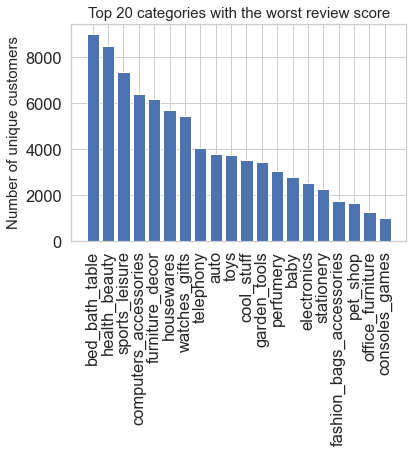

In [31]:
plt.bar(top_20_category['product_category_name_english'], top_20_category['customer_unique_id'])
plt.xticks(rotation=90)
plt.title('Top 20 categories with the worst review score', size = 15)
plt.ylabel('Number of unique customers', size = 15)
plt.savefig('figures/Top 20 Worst review score', dpi=400, bbox_inches='tight');
plt.show()

## Payments

In [32]:
payments = pd.read_csv('datasets/payments.csv')
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


- **"payment_sequential"** -> Indicates the number of payment of total installments
- **"payment_type"** -> Indicates the payment type it can be ['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined']
- **"payment_installments"** -> Indicates the number of installments payed in the period
- **"payment_value"** -> Indicates the period payment value 

Using Descriptive Statistics look the properties at this variable:

            Payment mean: 154.10038041699553
            Payment median: 100.0
            Payment std: 217.49301707022238
 


D:\Documentos\Clases\Platzi\Escuela DS\Django\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


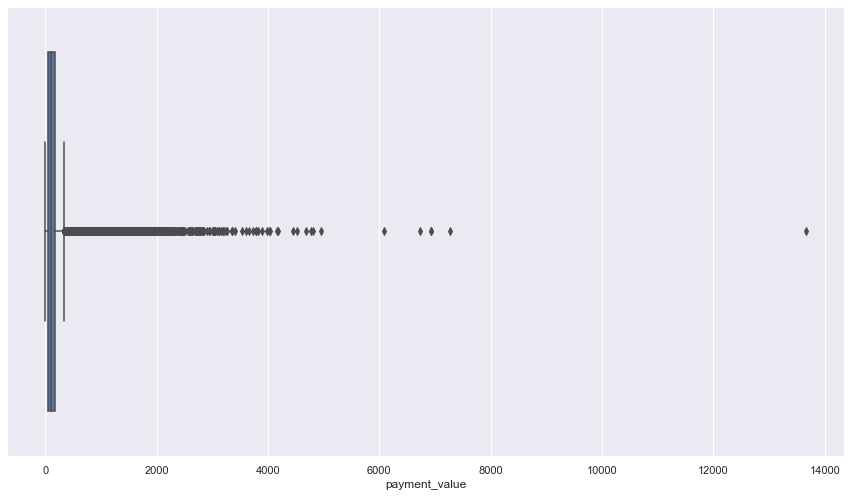

In [33]:
# First look at distribution of payments

sns.set(rc={'figure.figsize':(15,8.27)})
sns.boxplot(payments['payment_value'])

print(f'''Using Descriptive Statistics look the properties at this variable:

            Payment mean: {np.mean(payments['payment_value'])}
            Payment median: {np.median(payments['payment_value'])}
            Payment std: {np.std(payments['payment_value'])}
 ''')

Ok, there is many outliers, but is normal if the total payment is made in 1 installment

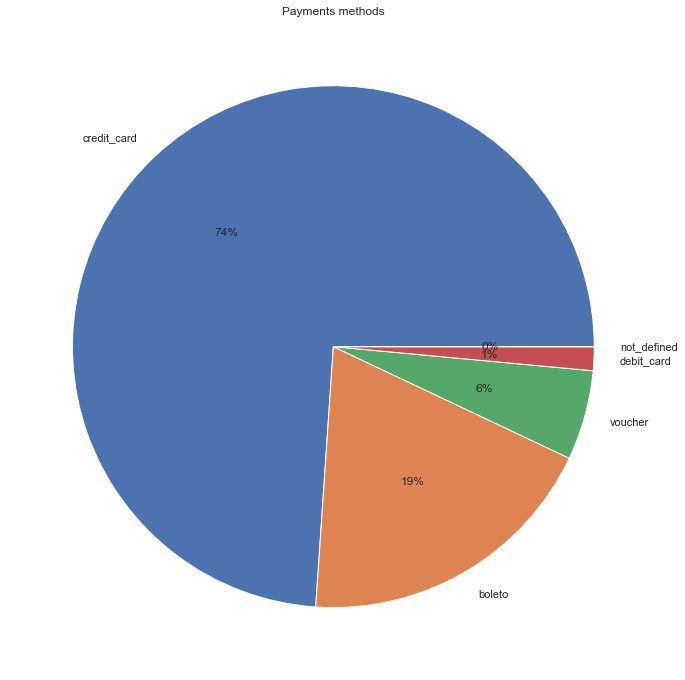

In [34]:
# Inspect the payment type

data = payments['payment_type'].value_counts()
labels = payments['payment_type'].unique()

plt.figure(figsize=(12,12))
plt.pie(data, labels=labels, autopct='%0.f%%')
plt.title("Payments methods")
plt.show()

Here we can see the credit card is the most popular payment type and "not_defined" correspond to canceled orders

Now to analyse the "order_id" column